# Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import plotly.express as px

#Библиотека для машшиного обучения
#scikit-learn - https://scikit-learn.org

import numpy as np
from sklearn. model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# from google.colab import drive
# drive.mount('/coins (1).xlsx')
df = pd.read_excel('/coins (1).xlsx')
df

,Name,Platform,Market Cap,Price,Circulating Supply,Volume(24h),% 1h,% 24h,% 7d
0,Tether,Ethereum,"$80,248,730,516",$1.00,80 210 538 011 USDT *,$18 811 647 783,0.0000,0.0001,0.0004
1,USD Coin,Ethereum,"$32,593,479,174",$0.9998,32 600 464 084 USDC *,$2 404 657 769,-0.0001,0.0001,0.0003
2,Binance USD,BNB Beacon Chain (BEP2),"$7,067,679,909",$0.9996,7 070 499 351 BUSD *,$2 537 944 726,-0.0002,0.0002,0.0004
3,Shiba Inu,Ethereum,"$6,427,129,880",$0.0000109,589 541 992 736 161 SHIB *,$126 530 418,-0.0033,-0.0050,-0.0031
4,Dai,Ethereum,"$5,269,630,139",$0.9997,5 271 311 800 DAI *,$82 831 239,-0.0003,-0.0001,0.0001
...,...,...,...,...,...,...,...,...,...
187,Pendle,Ethereum,"$91,702,433",$0.4583,200 107 450 PENDLE *,$1 413 661,0.0119,-0.0870,0.2399
188,USDX [Kava],BNB Smart Chain (BEP20),"$91,614,675",$0.8212,111 567 264 USDX *,$571 234,-0.0044,-0.0078,-0.0207
189,Powerledger,BNB Smart Chain (BEP20),"$91,117,709",$0.1897,480 237 763 POWR *,$3 368 311,0.0000,-0.0299,0.0099
190,Locus Chain,BNB Smart Chain (BEP20),"$90,170,815",$0.04333,2 081 062 787 LOCUS *,$454 580,-0.0015,0.0060,-0.1615


# Загрузим файл с данными по коинам и посмотрим содержимое

In [ ]:
df = pd.read_excel('/coins (1).xlsx')

In [ ]:
df.head(10)

,Name,Platform,Market Cap,Price,Circulating Supply,Volume(24h),% 1h,% 24h,% 7d
0,Tether,Ethereum,"$80,248,730,516",$1.00,80 210 538 011 USDT *,$18 811 647 783,0.0000,0.0001,0.0004
1,USD Coin,Ethereum,"$32,593,479,174",$0.9998,32 600 464 084 USDC *,$2 404 657 769,-0.0001,0.0001,0.0003
2,Binance USD,BNB Beacon Chain (BEP2),"$7,067,679,909",$0.9996,7 070 499 351 BUSD *,$2 537 944 726,-0.0002,0.0002,0.0004
3,Shiba Inu,Ethereum,"$6,427,129,880",$0.0000109,589 541 992 736 161 SHIB *,$126 530 418,-0.0033,-0.0050,-0.0031
4,Dai,Ethereum,"$5,269,630,139",$0.9997,5 271 311 800 DAI *,$82 831 239,-0.0003,-0.0001,0.0001
5,Wrapped Bitcoin,BNB Beacon Chain (BEP2),"$4,217,893,187","$27,923.71",151 051 WBTC *,$72 546 032,-0.0002,-0.0045,-0.0086
6,Chainlink,BNB Beacon Chain (BEP2),"$3,675,066,211",$7.11,517 099 970 LINK *,$115 763 187,-0.0006,-0.0146,-0.0289
7,Uniswap,BNB Beacon Chain (BEP2),"$3,375,997,064",$5.85,577 486 703 UNI *,$73 041 059,-0.0009,-0.0229,-0.0195
8,UNUS SED LEO,BNB Beacon Chain (BEP2),"$3,239,111,209",$3.40,953 954 130 LEO *,$422 800,0.0053,0.0087,0.0011
9,OKB,Klaytn,"$2,469,599,030",$41.16,60 000 000 OKB *,$6 454 305,0.0010,-0.0069,-0.0020


**В нашем датасете представлена следующая информация:**
- **Name** - тикер коина
- **Platform** - имя платформы
- **Market Cap** - рыночная капитализация
- **Price** - стоимость монеты
- **Circulating Supply** - наиболее точное количество монет, находящихся в обращении на рынке и в руках пользователей
- **Volume(24h)** - объем за сутки в $
- **% 1h,	% 24h,	% 7d** - процентное изменение катировок платформы по каждому коину за 1 час, 1 день и 1 неделю соответственно


Посмотрим информацию о данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                192 non-null    object 
 1   Platform            191 non-null    object 
 2   Market Cap          192 non-null    object 
 3   Price               192 non-null    object 
 4   Circulating Supply  192 non-null    object 
 5   Volume(24h)         192 non-null    object 
 6   % 1h                192 non-null    float64
 7   % 24h               192 non-null    float64
 8   % 7d                192 non-null    float64
dtypes: float64(3), object(6)
memory usage: 13.6+ KB


Заметим, что данные в таблице представлены в неудобном для анализа виде, например, наличие $ и запятых мешает обработке данных. Также стоит перевести данные столбца *market cap* в миллиарды рублей.
Преобразуем стобцы, содержащие рыночную капитализацию (*market cap*) и стоимость актива (*Price*) и округлим до 2-х знаков.

In [ ]:
df['Market Cap'] = df['Market Cap'].apply(lambda x: round(int(str(x).replace(',','').replace('$',''))/1000000000,2))

In [ ]:
df['Price'] = df['Price'].apply(lambda x: round(float(str(x).replace(',','').replace('$','')),2))

Снова посомтрим информацию о данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                192 non-null    object 
 1   Platform            191 non-null    object 
 2   Market Cap          192 non-null    float64
 3   Price               192 non-null    float64
 4   Circulating Supply  192 non-null    object 
 5   Volume(24h)         192 non-null    object 
 6   % 1h                192 non-null    float64
 7   % 24h               192 non-null    float64
 8   % 7d                192 non-null    float64
dtypes: float64(5), object(4)
memory usage: 13.6+ KB


Заметим, что теперь столбцы Market Cap и Price стали числовыми, а значит с ними можно работать

Нас интересует надежность и прибыльность платформы, поэтому сгруппируем данные по платформам и оставим только нужные столбцы

In [ ]:
df.groupby(['Platform']).agg({'Market Cap':'mean','Price':'mean','% 7d':'sum'}).sort_values(by = ['Market Cap','% 7d'],ascending = False)

,Market Cap,Price,% 7d
Platform,,,
Ethereum,2.928462,818.461731,0.9490
BNB Beacon Chain (BEP2),2.302727,5077.435455,0.0060
Klaytn,1.092727,9.428182,0.3112
Arbitrum,0.803333,26.203333,-0.0789
Aptos,0.802857,8.027143,0.0580
Tron10,0.750000,0.000000,0.2147
Optimism,0.700000,2.230000,0.0055
Stellar,0.429773,2.537045,-0.3095
BNB Smart Chain (BEP20),0.415714,16.031905,1.4288


  Заметим, что макисмальную рыночную капитализации можно наблюдать у двух платформ: Ethereum и BNB Beacon Chain (BEP2). Причем по истечении 7-ми дней изменение их катировок омталось положительным, что подтверждает их надежность, при этом платформа Arbitrum с довольно большой капитализацией и ценой актива по прошествии 7-ми дней опустилась на 0.08 %

# Рассмотрим применение методов машинного  обучения на примере платформы Ethereum

У нас есть непрерывный набор числовых данных, поэтому будем использовать модель линейной регрессии

Создадим логический формат файла для более удобного применения методов машинного обучения, выделив платформу Ethereum

In [ ]:
df_ml = df.query('Platform == "Ethereum"').reset_index()
df_ml.head(10)

,index,Name,Platform,Market Cap,Price,Circulating Supply,Volume(24h),% 1h,% 24h,% 7d
0,0,Tether,Ethereum,80.25,1.00,80 210 538 011 USDT *,$18 811 647 783,0.0000,0.0001,0.0004
1,1,USD Coin,Ethereum,32.59,1.00,32 600 464 084 USDC *,$2 404 657 769,-0.0001,0.0001,0.0003
2,3,Shiba Inu,Ethereum,6.43,0.00,589 541 992 736 161 SHIB *,$126 530 418,-0.0033,-0.0050,-0.0031
3,4,Dai,Ethereum,5.27,1.00,5 271 311 800 DAI *,$82 831 239,-0.0003,-0.0001,0.0001
4,13,Cronos,Ethereum,1.71,0.07,25 263 013 692 CRO *,$11 641 887,-0.0030,-0.0181,-0.0109
5,14,ApeCoin,Ethereum,1.54,4.19,368 593 750 APE *,$52 173 016,0.0020,-0.0047,-0.0137
6,17,Quant,Ethereum,1.45,119.85,12 072 738 QNT *,$12 729 413,0.0025,-0.0033,-0.0536
7,36,Frax Share,Ethereum,0.62,8.67,71 262 834 FXS *,$29 006 073,-0.0021,-0.0782,-0.0265
8,37,Gemini Dollar,Ethereum,0.61,1.00,607 049 883 GUSD *,$387 010,-0.0010,-0.0016,0.0088
9,39,Huobi Token,Ethereum,0.58,3.58,162 233 844 HT *,$10 821 413,-0.0009,-0.0035,-0.0203


Удалим лишние для анализа столбцы

In [ ]:
df_ml = df_ml.drop(columns = ['index','Name','Platform','Circulating Supply','Volume(24h)'])
df_ml.head(10)

,Market Cap,Price,% 1h,% 24h,% 7d
0,80.25,1.00,0.0000,0.0001,0.0004
1,32.59,1.00,-0.0001,0.0001,0.0003
2,6.43,0.00,-0.0033,-0.0050,-0.0031
3,5.27,1.00,-0.0003,-0.0001,0.0001
4,1.71,0.07,-0.0030,-0.0181,-0.0109
5,1.54,4.19,0.0020,-0.0047,-0.0137
6,1.45,119.85,0.0025,-0.0033,-0.0536
7,0.62,8.67,-0.0021,-0.0782,-0.0265
8,0.61,1.00,-0.0010,-0.0016,0.0088
9,0.58,3.58,-0.0009,-0.0035,-0.0203


Сохраним данный файл в формате csv

In [ ]:
df_ml.to_csv('df_ml.csv')

Логический файл успешно сохранен
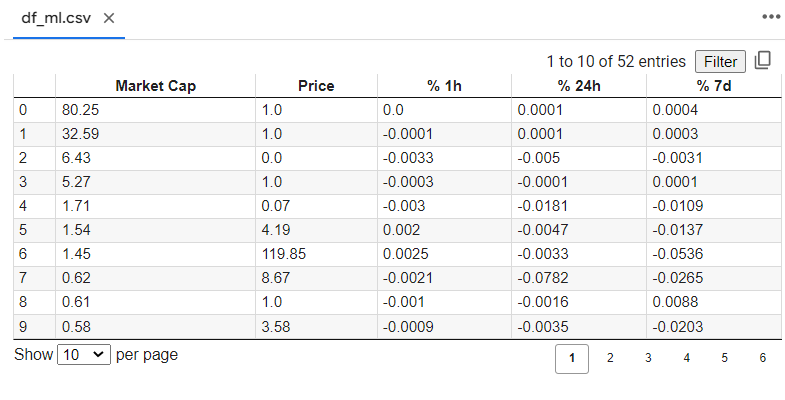

In [ ]:
df_ml = pd.read_csv('/content/df_ml.csv')

Построим графики для визуализации наших показателй

In [ ]:
fig = px.line(df_ml, y= '% 1h',title='Изменение показателей процентных пунктов за час')
fig.show()

In [ ]:
fig = px.line(df_ml, y= '% 24h',title='Изменение показателей процентных пунктов за день')
fig.show()

In [ ]:
fig = px.line(df_ml, y= '% 7d',title='Изменение показателей процентных пунктов за неделю')
fig.show()

In [ ]:
fig = px.line(df_ml, y= ['% 1h','% 24h','% 7d'],title='Изменение показателей процентных пунктов')
fig.show()

Построим модель предсказания процентного изменения катировок платформы в течение одной недели **(target = '% 7d')**

Проверим данные на null

In [ ]:
df_ml.isnull().sum()

Unnamed: 0    0
Market Cap    0
Price         0
% 1h          0
% 24h         0
% 7d          0
dtype: int64

Проверим данные на дублирующиеся записи

In [ ]:
df_ml.duplicated().sum()

0

Проанализируем наши данные, узнаем их тип и некоторые численные значения

In [ ]:
df_ml.dtypes

Unnamed: 0      int64
Market Cap    float64
Price         float64
% 1h          float64
% 24h         float64
% 7d          float64
dtype: object

In [ ]:
df_ml.describe()

,Unnamed: 0,Market Cap,Price,% 1h,% 24h,% 7d
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,25.500000,2.928462,818.461731,-0.000502,-0.013069,0.018250
std,15.154757,11.927021,4032.264749,0.004429,0.026531,0.075655
min,0.000000,0.090000,0.000000,-0.010500,-0.087000,-0.080300
25%,12.750000,0.172500,0.217500,-0.002575,-0.025650,-0.020825
50%,25.500000,0.240000,1.000000,-0.000800,-0.011000,-0.000900
75%,38.250000,0.572500,3.190000,0.000900,-0.000050,0.026025
max,51.000000,80.250000,27923.880000,0.016300,0.059400,0.350800


Создадим две диаграммы, которые покажут нам баланс данных. Первая диаграмма *countplot* покажет нам, как часто встречается то или иное значение **% 7d**. Вторая круговая диаграмма *pie* покажет нам, как часто встречается то или иное значение **% 7d** в процентном соотношении.

Text(0.5, 1.0, 'Показатель')

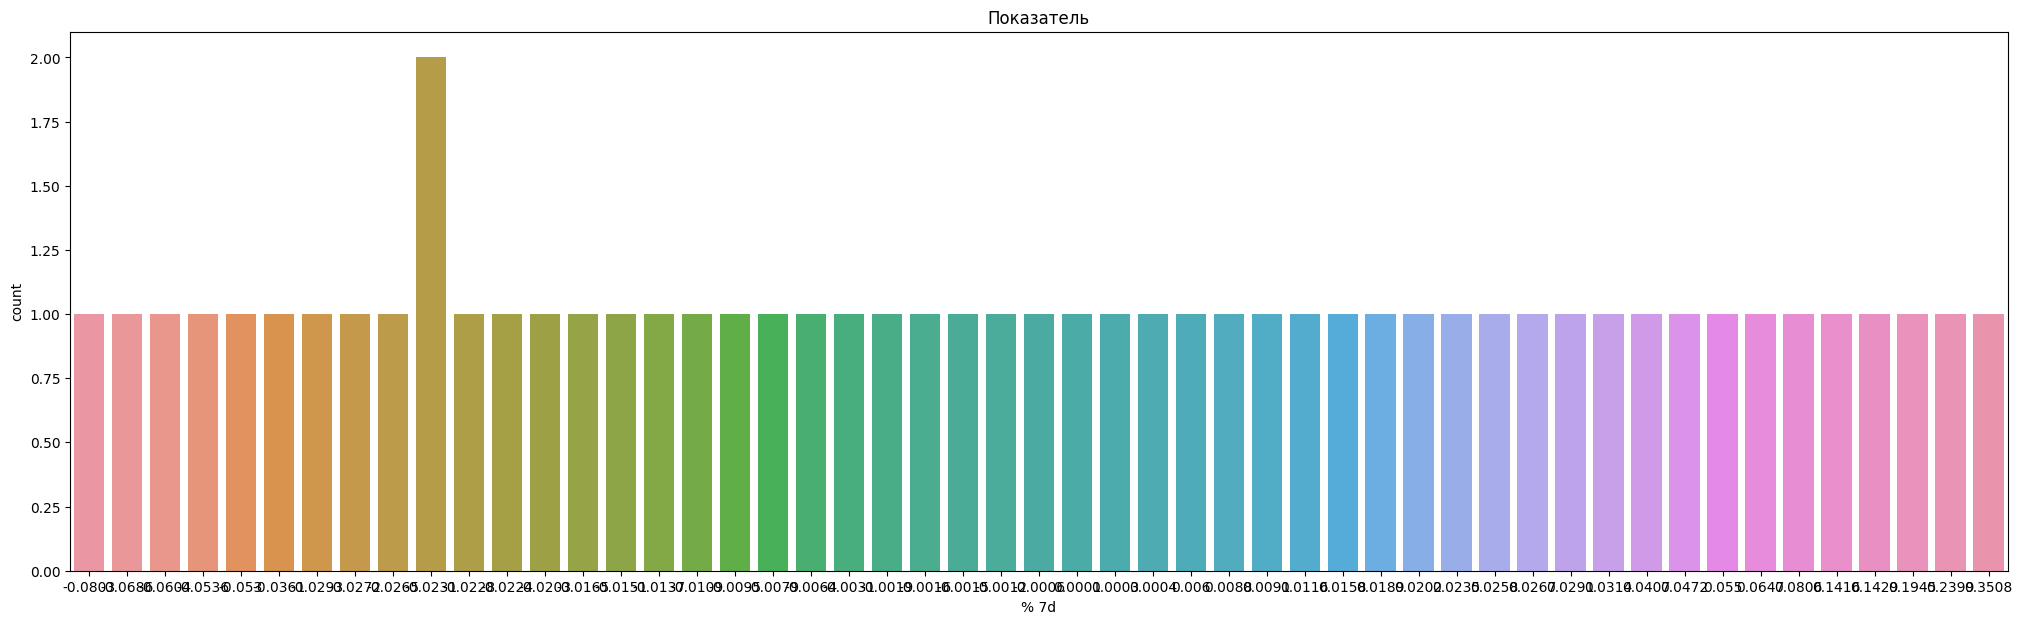

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x='% 7d',data=df_ml)
plt.title("Показатель")

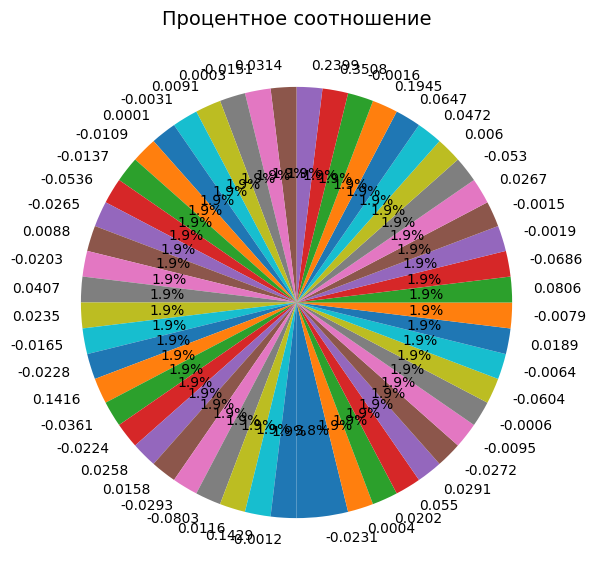

In [ ]:
plt.figure(figsize=(25,7))
labels =df_ml['% 7d'].value_counts(sort = True).index
sizes = df_ml['% 7d'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=False, startangle=270,)
plt.title('Процентное соотношение',size = 14)
plt.show()

Разобьём данные на выборки *train* и *test* для машинного обучения

In [ ]:
X = df_ml[['Market Cap','Price','% 1h','% 24h']]
Y = df_ml['% 7d']

X_train,X_test,y_train,y_test = train_test_split (X,Y,test_size=0.3,random_state=0)

Создадим модель линейной регрессии и обучим её на наших данных. С помощью нашей модели попробуем предсказать, какие значения value мы получим на основе выборки X_test

In [ ]:
model = GradientBoostingRegressor()

model.fit(X_train,y_train)

GradientBoostingRegressor()

# Получаем результаты

Точность модели составила 3%

In [ ]:
model.score(X_train,y_train)

1.0

Предсказываем ответ на основе некоторого тестового вектора

In [ ]:
model.predict(X_test)

array([ 0.1429,  0.2399, -0.0079,  0.0472, -0.0224, -0.0604, -0.0079,
       -0.0203, -0.0361, -0.0686,  0.0314, -0.0137,  0.0258, -0.0604,
        0.0314,  0.0647])

# Спрогнозируем теперь процентное изменение за час (target = %1h), зная капитализацию, стоимость и изменения за сутки и за неделю

In [ ]:
X = df_ml[['Market Cap','Price','% 7d','% 24h']]
Y = df_ml['% 1h']

X_train,X_test,y_train,y_test = train_test_split (X,Y,test_size=0.3,random_state=0)

In [ ]:
model = GradientBoostingRegressor()

model.fit(X_train,y_train)

GradientBoostingRegressor()

Точность модели составила 21%

In [ ]:
model.score(X_train,y_train)

0.9992249062016113

# Вывод

В нашем кейсе мы рассмотрели конкретную базу данных и преобразовали ее структуру(создали свою логическую структуру и логический файл) для более удобного анализа и обработки.  Таким образом мы построили модель линейной регрессии и обучили ее предсказывать процентное изменение катировок за неделю платформы Ethereum на основе данных о капитализации компании, стоимости активов, а также изменении катировок за 1час и 1 день, а также предсказали изменение катировок за 1 час